# Xây dựng mạng ANN từ điểm khởi đầu?
-----------

Câu hỏi đặt ra là: tại sao luôn nghe cụm từ "build from scratch".
- Việc ta sử dụng lại các thư viện có sẵn như Keras và các backend được hỗ trợ như Tensorflow,PyTorch,v.v thì không có gì là sai cả.Và thật ra thì rất khuyến khích nên sử dụng thành thạo các thư viện này,
- Nhưng mà để mình hiểu rõ ANN - các neural network đơn giản nhất này hoạt động ra sao thì tại sao ta lại ngại việc code nó lại bằng vài dòng Python.
- Thư viện vẫn dùng là numpy vì vấn đề tối ưu hóa - vectorization.

##I. Thứ đầu tiên ta cần là dữ liệu!
----------------------------

![alt text](https://miro.medium.com/max/1104/1*uGmgaSPI_pv25dBugw1AZQ.png)

Trong ví dụ của ta, ANN sẽ nhận vecto (3,1) và sẽ tiên đoán nhãn tương ứng là 1 hay 0 ( nhìn có vẻ là Binary Classifier) thì đúng rồi - nó đó ... vì chỉ có 2 nhãn thôi. Nhưng ANN còn có thể làm hơn cả hai nhãn nữa nhưng trong bài này cứ 2 đi cho dễ hiểu.

In [ ]:
#Để biểu diễn dữ liệu ta cần một thứ mà ai cũng cần biết : Numpy
import numpy as np

In [ ]:
#Các đặc trưng đầu vào - thứ sẽ được "chạy" qua lớp mạng ANN này! - Independant variables.
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],
                      [0,1,0]])

In [ ]:
# Và các nhãn/ đẩu ra tương ứng với sẽ được đánh giá với giá trị prediction qua mỗi epochs! - Dependant variables.
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])

In [ ]:
# Điểm dữ liệu 1 hay đối tượng nghiên cứu 1 là
print(input_set[0])

[0 1 0]


In [ ]:
# Nhãn tương ứng của đối tượng 1:
print(labels[0])

[1 0 0 1 1 0 1]


In [ ]:
#Một công việc nhỏ nhặt mà không nên bỏ qua: kiểm tra chiều của dữ liệu
print("Chiều của dữ liệu đầu vào: ",input_set.shape)
print("Chiều của dữ liệu đầu ra:",labels.shape)

Chiều của dữ liệu đầu vào:  (7, 3)
Chiều của dữ liệu đầu ra: (1, 7)


In [ ]:
# !!Nếu cứ để dữ liệu input chạy qua mà so sánh với labels như vậy là không ổn. Vì thế ta cần reshape lại dữ liệu
labels = labels.reshape(7,1)

In [ ]:
# Nhãn tương ứng của đối tượng 1:
print(labels[0])

[1]


- Ở đây ta sẽ định nghĩa với y = 1 là true và y = 0 là false , nhưng thật ra cũng không quan trọng mấy ... . Vì công việc ở đây là việc dự đoán đầu ra y dựa trên đầu vào thôi , ý nghĩa của y ( y bằng mấy sẽ không được quá coi trọng trong bài "build from scratch" này ).
- Và giờ ta sẽ đi xây dựng một mạng ANN **chỉ** một lớp đầu vào - thê thôi - không lớp ẩn nào trong đây - và cuối cùng - không kém phần quan trọng - lớp đầu ra! 

- Nhắc lại và ANN: thì đây là một thuật toán supervised -  và không chỉ dùng trong việc Classification mà còn trong cả Regression.
- [ANN regression](http://uc-r.github.io/ann_regression) - sẽ cố đọc và viết bài này sau.


##II. ANN gồm 2 giai đoạn: 
--------------------------
- Feed-forward : truyền vào, đưa ra dự đoán.
- Back-propagation : học/cập nhập các **Weight** và **bias** lại bằng cách "truyền" lại việc học này đến các lớp trước. 

### Feed-forward
![alt text](https://miro.medium.com/max/1280/0*Olb_5k6mHbrZqEzn.png)

- Nhìn hình trên, ta thấy rằng , cứ mỗi lần ta muốn đưa ra dự đoán: ta cần nhận vào một vector (3,1) - vecto này được gọi là vecto đặc trưng( cho từng cá thể nào đó) - các $w_i$ sẽ được nhân tương ứng với từng $x_i$ 
- Các $w_i$ mang ý nghĩa rằng các $x_i$ sẽ mang ý nghĩa đến mức nào đến việc đưa ra dự đoán $y_i$ như thế nào . Ví dụ : Nếu $w_1 = 0$ ta dịch nghĩa rằng $w_1$ không mang ý nghĩa gì cho việc dự đoán kết quả đầu ra .
- XW = np.dot(inputs, weights) .
- **Ta kí hiệu prediction là $\hat y_i$ còn $y_i$ mới là label thực sự.

In [ ]:
inputs = input_set[0]
# khới tạo random weights
weights = [1,2,3]
XW = np.dot(inputs, weights) 
print("Tổng các đặc trưng với trọng số trong 1 node:",XW)

Tổng các đặc trưng với trọng số trong 1 node: 2


In [ ]:
XW = np.dot(np.array([0,0,0]),weights)
print(XW)

0


- Nhưng điểu này không ổn với trường hợp X = [0,0,0] vì W như thế nào thì dự đoán y của ta cũng đều ra bằng 0 - tưởng tượng đường thẳng ta cứ quay quanh mãi qua (0,0) 
- Vậy ta thêm bias b để tránh trường hợp này.
$$X.W=x_1.w_1 + x_2.w_2 + x_3.w_3 + b$$

In [ ]:
bias = 1
XW = np.dot(inputs, weights)+ bias
print("Tổng các đặc trưng với trọng số trong 1 node đã có bias:",XW)

Tổng các đặc trưng với trọng số trong 1 node đã có bias: 3


- Nhận xét rằng: cả hai giá trị trên đều lớn hơn 1 ( và đương nhiên là nhãn 0 rồi ... ) , vậy có cách nào để đưa giá trị này và khoảng [0,1] này, hay nói cách khác - có hàm nào để sau khi ánh xạ $[-\infty ,+ \infty]$ thành đoạn (0,1) .

#### Giới thiệu : **activation function**.
----------------------

![Activation Function](https://miro.medium.com/max/970/0*lZTAMCLhGtlPusTg.png)

- Đây là hàm sigmoid - thuộc họ logistic biễu diễn tổng quát là:
$$f(z) = \frac{L}{1+e^{-k(x-x_0)}}$$
- Vì L để đánh giá max ( khi x tiến về dương vô cực ) thì sigmoid có tiệm cận là 1.
- k của sigmoid đánh giá độ tăng của hàm ( khi ta lấy đạo hàm bậc nhất thì nó ra hình chuông - Gauss).
- $x_0$ đánh giá chỗ nào sẽ là điểm uốn.
- Và 1 điểm đặc biệt nữa $f'(x) = f(x)(1- f(x))$ điều này sẽ cho ta một số thuận lợi để tính độ lỗi!.

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
print("Label của XW và bias vừa tính ở trên:",sigmoid(XW))

Label của XW và bias vừa tính ở trên: 0.9525741268224334


In [ ]:
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

### Back-propagation
- Trong quá trình train cho một mạng ANN, tự hỏi : từ đâu ra các con số $w_i$ ... ta cho cứ cho nó một cách ngẫu nhiên, và trong quá trình training mạng ANN , các $w_i$ này sẽ dần tiến về mà cost function là nhỏ nhất!

In [ ]:
XW = np.dot(input_set[0], weights)+ bias
# Đây là label dự đoán
z = sigmoid(XW)
print("Label dự đoán là:",z)
error = z - labels[0]
print("Độ lỗi của label này error",error)

Label dự đoán là: 0.9525741268224334
Độ lỗi của label này error [-0.04742587]


In [ ]:
ex_weights = np.hstack((weights,bias))
print(ex_weights)

[1 2 3 1]


- Vì thế độ lỗi của cả qua trình sẽ là:
![alt text](https://miro.medium.com/max/1104/0*DGjzN-ppsTBxYsFp.png)
---------------------

In [ ]:
weights = np.array(([1,2,3])).reshape(3,1)
bias = np.ones(7).reshape(7,1)
XW = np.dot(input_set, weights)

In [ ]:
z = sigmoid(XW+bias)
print("Ma trận dự đoán/đầu ra là\n",z)

Ma trận dự đoán/đầu ra là
 [[0.95257413]
 [0.98201379]
 [0.88079708]
 [0.98201379]
 [0.99908895]
 [0.99752738]
 [0.95257413]]


In [ ]:
error = np.subtract(z,labels)
print("Ma trận lỗi là\n",error)

Ma trận lỗi là
 [[-4.74258732e-02]
 [ 9.82013790e-01]
 [ 8.80797078e-01]
 [-1.79862100e-02]
 [-9.11051194e-04]
 [ 9.97527377e-01]
 [-4.74258732e-02]]


In [ ]:
# Đây là MSE !
np.sum(error **2)/error.shape[0]

0.39143402922962667

#### Phân biệt cost function ,loss function và objective function.
--------------------

- [Nên phân việt giữa cost function , loss function và objective function!! ](https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing)
- Đại khái về Loss function:
 - [Loss function được định nghĩa chung chung như **square loss**.](https://en.wikipedia.org/wiki/Loss_functions_for_classification#Square_loss) loss function cho Regression.
 - [Hay Hinge loss thường thấy trong SVM.](https://en.wikipedia.org/wiki/Hinge_loss) loss function cho Classification.
    -  Một hàm $f$ ánh xạ không gian đầu vào - giả sử là $\mathbf{X}$ sẽ có đầu ra là không gian $Y$ = {0,1} (tùy vào cách định nghĩa của mình , có thể {-1,1} hay số phần tử hơn cũng được .
 
 $$f : X \rightarrow \mathbb{R}$$
- Về cost function: 
 - Nó thường tổng quát hơn và đôi khi nhìn dưới dạng tổng ( và lấy trung bình như MSE).
 - Và được coi trong đây như là **lỗi** của cả quá trình học tập.
- Và objective function: thứ mà ta phải đi tối ưu - để ý trong các bài của anh Vũ Hữu Tiệp thì argmin hay argmax kèm theo biến giao động nào đó.

![alt text](https://miro.medium.com/proxy/1*3MsFzl7zRZE3TihIC9JmaQ.png)

- Trong quá trình feed-forward và cả quá trình back-prop ta **không** được thay đổi gi vào cả , ta không thể sửa cả hàm actiavtion vì thế lựa chọn còn lại là trên ma trận trọng số **W** - và kèm theo luôn là bias **b**.
- Thì có hàng tá cách để tối ưu - optimization - dùng Lagrange,analytical solution. Nhưng gradient descent lại được ưa chuộng trong tất thảy - nhất là trong ML , Data Mining: vì nó cực dễ cài đặt và tính toán vô cùng nhanh! -Thế thôi.
- Nếu có thể làm sáng tỏ về điểm yếu của analytical solution thì các phương trình có đi kèm log là thứ không nhiều người muốn.
- [Analytical solution of Linear Regression](https://towardsdatascience.com/analytical-solution-of-linear-regression-a0e870b038d5) 

#### Giải quyết hàm mục tiêu: nghiệm tối ưu
------------------------

- Như đã nói ở trên thì ta có thể áp dụng phương pháp gradient descent vào ngay cho ma trận trọng số $W$
$$\mathbf{W}_{sau} = \mathbf{W}_{trước} - \text{learning rate} . \frac{\partial Error}{\partial W_{trước}}$$

Ta có hàm mất mất dưới dạng MSE - và đồng thời đây cũng là hàm mục tiêu của mình.

$$\text{Error} = J(\mathbf{y}, \mathbf{ \hat y}) = \sum_{i=1}^{N}(\mathbf{ \hat y_i} - \mathbf{ \ y_i})^2$$

$$\longrightarrow \nabla \mathbf({w}) J(\mathbf{y}, \mathbf{ \hat y})$$

$$ =\frac {\partial J} {\partial \hat {y} } . \frac {\partial \hat y} {\partial z } . \frac {\partial z} {\partial {w} } $$


- Tính từng cái từ trái sang:
$$ \frac {\partial J} {\partial \hat {y} } = 2\hat {y}( \hat {y} - {y} )$$

$$\begin{align*} 
\frac {\partial \hat y} {\partial z } =  1 
\end{align*}
 $$

$$\begin{align*} 
\begin{split}
\frac {\partial z} {\partial w }
& = \frac{\partial (xw)} {\partial w } \\
& = X
\end{split}
\end{align*}$$
... vì X không phải là hàm theo w

In [ ]:
np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)

In [ ]:
print("Ma trận trọng số:",weights," \nvà bias đi kèm:",bias)

Ma trận trọng số: [[0.37454012]
 [0.95071431]
 [0.73199394]]  
và bias đi kèm: [0.59865848]


##III. Thử code lại những gì đã nói

In [ ]:
2*z*(z-labels)

array([[-9.03533195e-02],
       [ 1.92870217e+00],
       [ 1.55160699e+00],
       [-3.53254124e-02],
       [-1.82044236e-03],
       [ 1.99012174e+00],
       [-9.03533195e-02]])

\begin{eqnarray}
\mathbf{a}^{(0)} &=& \mathbf{x} \\
z_{i}^{(l)} &=& \mathbf{w}_i^{(l)T}\mathbf{a}^{(l-1)} + b_i^{(l)} \\
\mathbf{z}^{(l)}  &=& \mathbf{W}^{(l)T}\mathbf{a}^{(l-1)} + \mathbf{b}^{(l)},~~ l =  1, 2, \dots, L \\
\mathbf{a}^{(l)} &=& f(\mathbf{z}^{(l)}), ~~ l =  1, 2, \dots, L \\
\mathbf{\hat{y}} &=& \mathbf{a}^{(L)}
\end{eqnarray}

In [ ]:
lr = 0.05 #learning rate
np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.uniform(-1,1,(7,1))
start = time.time()
for epoch in range(25000):
  XW = np.dot(input_set,weights)
  z = XW + bias
  y_hat = sigmoid(z)
  E_1 = (y_hat - labels)/labels.shape[0]
  if epoch % 1000 ==0:
      print("Tổng error tại epoch thứ",epoch," là:",E_1.sum())
  dW_1 = np.dot(input_set.T,E_1)
  db_1 = np.sum(E_1,axis = 1, keepdims= True)
  weights = weights - lr*dW_1 #Gradient descent
  bias = bias - lr*db_1
end = time.time()
print("Thời gian train 25000 vòng lặp là:",end - start)

Tổng error tại epoch thứ 0  là: 0.12974050467718554
Tổng error tại epoch thứ 1000  là: 0.011462182159169497
Tổng error tại epoch thứ 2000  là: 0.006565760526672729
Tổng error tại epoch thứ 3000  là: 0.004583669363253681
Tổng error tại epoch thứ 4000  là: 0.0035160188668926094
Tổng error tại epoch thứ 5000  là: 0.002850394523020364
Tổng error tại epoch thứ 6000  là: 0.002396252749528906
Tổng error tại epoch thứ 7000  là: 0.002066820195498512
Tổng error tại epoch thứ 8000  là: 0.0018170097072344534
Tổng error tại epoch thứ 9000  là: 0.0016211017855099893
Tổng error tại epoch thứ 10000  là: 0.0014633647951823653
Tổng error tại epoch thứ 11000  là: 0.001333640283963791
Tổng error tại epoch thứ 12000  là: 0.0012250778560136495
Tổng error tại epoch thứ 13000  là: 0.0011328909623221086
Tổng error tại epoch thứ 14000  là: 0.0010536346067647649
Tổng error tại epoch thứ 15000  là: 0.000984766377410106
Tổng error tại epoch thứ 16000  là: 0.0009243691647068185
Tổng error tại epoch thứ 17000  là: 0

In [ ]:
test_points = np.array(([0,0,1],[1,0,1],[1,1,1]))
results = np.round_(sigmoid(np.dot(input_set,weights) + bias ))
print("Giá trị dự đoán là:\n",results)

Giá trị dự đoán là:
 [[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [ ]:
start = time.time()
for epoch in range(10000):
  XW = np.dot(input_set,weights_1)
  z = XW + b_1
  y_hat = sigmoid(z)
  E_1 = (y_hat - labels)/labels.shape[0]
  if epoch % 1000 ==0:
      print("Tổng error tại epoch thứ",epoch," là:",E_1.sum())
  dW_1 = np.dot(input_set.T,E_1)
  db_1 = np.sum(E_1,axis = 1, keepdims= True)
  weights_1 = weights_1 - lr*dW_1 #Gradient descent
  bias_1 = bias_1 - lr*db_1
end = time.time()
print("Thời gian train 10000 vòng lặp là:",end - start)

Tổng error tại epoch thứ 0  là: 0.28572764048937666
Tổng error tại epoch thứ 1000  là: 0.1088133691616588
Tổng error tại epoch thứ 2000  là: 0.08879507982879563
Tổng error tại epoch thứ 3000  là: 0.08659585591441904
Tổng error tại epoch thứ 4000  là: 0.086342712114255
Tổng error tại epoch thứ 5000  là: 0.08631375073368265
Tổng error tại epoch thứ 6000  là: 0.08631043818978516
Tổng error tại epoch thứ 7000  là: 0.08631005919066956
Tổng error tại epoch thứ 8000  là: 0.08631001570109523
Tổng error tại epoch thứ 9000  là: 0.08631001058366576
Thời gian train 10000 vòng lặp là: 0.28319454193115234


# Code bằng Python:
-----------

Những thứ từ nãy đến giờ chỉ ta làm chỉ là một lớp input và một lớp ouput. Vậy để xây dựng mạng ANN ta cần thêm lớp ẩn **hidden layer**.
Và để tránh lặp đi lặp lại việc viết các lớp này, ta nên đóng gói nó. Để cho tiện việc sử dụng sau này.

## Định nghĩa class Layer:

![alt text](https://machinelearningcoban.com/assets/14_mlp/mlp_notation.png)

> Định nghĩa class Layer tại chỗ mà ta đang xét sẽ:
 - Có ma trận trọng số $W$ và bias $b$ - và cách khởi tạo là lấy random.
 - Giữ lại kết quả từ lớp tính toán trước. Vi ta không cập nhập ngay kết quả mà cần giữ lại thông tin để back-prop.
 - Có kết quả đầu ra được kích hoạt bởi **activation function**.

Định nghĩa hàm sigmoid với đạo hàm của nó:

In [ ]:
def sigmoid(x, derivative=False):
    if derivative:
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [ ]:
class Layer:
  def __init__(self,weight_mat_shape,previous_results):
    '''
    A layer object:
     to compute cost of 
     Param:
      weights : weights matrix with the shape depend on current layer's neurons and its previous layer's
         neurons.
      bias :
      previous results : matrix to store results from back-prop to further transfer to its previous layer(s).
      out : output matrix

    '''
    self.weights = self.init_weights(weight_mat_shape)
    self.bias = np.random.uniform(-1,1)
    self.previous_results = previous_results
    self.out = None
  def init_weights(self,weight_mat_shape):
    return np.random.uniform(-1,1, weight_mat_shape)
  
  def compute_cost(self,previous_results,activation_function):
    self.previous_results = previous_results
    XW = self.previous_results.dot(self.weights) + self.bias
    self.out = activation_function(XW) 

In [ ]:
def mse(y_pred, y, derivative=False):
    if derivative:
        return y_pred*(y_pred-y)
    return 0.5*(y_pred-y)**2

## Định nghĩa class ANN:

> Để định nghĩa lớp ANN, ta cần:
 - input_features , input_matrix,... hay bất cứ tên nào bạn muốn, **nhưng** không có định nghĩa hàm nào làm thay đôi input này!.
 - output_values , output_labels ... cũng như trên.
 - Hyperparemeter learning rate , có giá trị mặc định là 0.05.
 - Activation function dùng trong đây là sigmoid.
---------
> Hàm của lớp ANN
 - add_layer; 
 - feed_forward;
 - back_prop;
 - train;
 - predict.

In [ ]:
class ANN:
  def __init__(self,input_values,output_values,learning_rate =  0.05 ,activation_function = sigmoid):
    '''
      Param:
        input_values : the initialization feature vector/matrix.
        output_values : the ground truth labels-vector.
        learning_rate : hyperparameter 
        activation_function : default as sigmoid function.
    '''
    self.input_values = input_values
    self.output_values = output_values
    self.learning_rate = learning_rate
    self.activation_function = activation_function

    self.layers = []

  def add_layer(self,neuron_nums):
    '''
      Param:
        neuron_nums : numbers of neuron of the going-to-be initilized layer
    '''
    if len(self.layers) == 0:
      # If it was the first layer, then the init layer would take the shape of
        # First : the amount of columns in feature matrix ie numbers of features.
        # Second : the neuron numbers  
      init_weights_mat_shape = (self.input_values.shape[1],neuron_nums)

      init_lay = Layer(init_weights_mat_shape,self.input_values)
      self.layers.append(init_lay)
    else:
      last_weights_mat_shape = (self.layers[-1].weights.shape[1],neuron_nums)
      last_out = self.layers[-1].out

      layer = Layer(last_weights_mat_shape,last_out)
      self.layers.append(layer)
    ##lấy [-1] : lớp cuối , Python làm mọi thứ dễ dàng hơn.
    ## Và còn chút bên sklearn The ith element represents the number of neurons in the ith hidden layer.

  def feed_forward(self):
    previous_results = self.layers[0].previous_results
    for layer in self.layers:
      layer.compute_cost(previous_results,self.activation_function)
      # compute_cost -> cập nhật out cho layer hiện hành và cứ thế 
      previous_results  = layer.out
    ## Đến đây phải chạy lên thêm self layers vào __init__ và đồng thời định nghĩa hàm add layer
  
  def back_prop(self):

    previous_layer = last_layer = self.layers[-1]
    d = mse(last_layer.out, self.output_values, True) * self.activation_function(last_layer.out, True)

    last_layer.weights -= self.learning_rate * last_layer.previous_results.T.dot(d)
    last_layer.bias -= self.learning_rate * np.mean(d)

    for layer in np.flip(self.layers, axis=0)[1:]:
      d = d.dot(previous_layer.weights.T) * self.activation_function(layer.out, True)
      layer.weights -= self.learning_rate * layer.previous_results.T.dot(d)
      layer.bias -= self.learning_rate * np.mean(d)
      previous_layer = layer
  
  def train(self,epoch_nums):
    self.layers = np.array(self.layers)
    error_list = []
    for i in range(epoch_nums):
      self.feed_forward()
      self.back_prop()
      error_list.append(np.mean(mse(self.layers[-1].out, self.output_values)))
      if error_list[-1] < 10**(-2):
        break
    return error_list
  
  def predict(self,test_values):
    previous_results = np.array(test_values)
    for layer in self.layers:
        layer.compute_cost(previous_results, self.activation_function)
        previous_results = layer.out
    return previous_results 

In [ ]:
import numpy as np
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],
                      [0,1,0]])
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])
labels = labels.reshape(-1,1)
labels.shape

(7, 1)

In [ ]:
np.random.seed(42)
ann = ANN(input_set, labels, learning_rate=0.05, activation_function=sigmoid)
ann.add_layer(3)
ann.add_layer(1)

In [ ]:
import time
start = time.time()
error = ann.train(epoch_nums=1000)
end = time.time()
print("Time to train",len(error),"epochs",end-start)

Time to train 1000 epochs 0.09484267234802246


In [ ]:
ypred = ann.predict(input_set)
ypred = np.round_(result)

In [ ]:
np.mean(ypred == labels)

1.0

In [ ]:
ypred

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]])

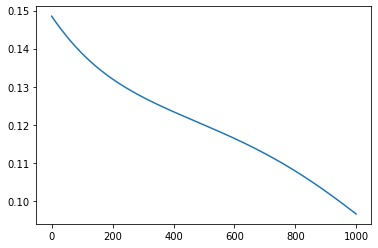

In [ ]:
import matplotlib.pyplot as plt
plt.plot(error)

In [ ]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# cost or loss function
def cost_log(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

def cost_MSE(Y, Yhat):
    return np.sum(0.5*(Y-Yhat)**2)/Y.shape[1]

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 2 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels
for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,2,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
Y = convert_labels(y, C)
N = X.shape[1]

In [ ]:
X.shape

(2, 200)

In [ ]:
y.shape

(200,)

In [ ]:
np.random.seed(42)
ann = ANN(X.T, y, learning_rate=0.05, activation_function=sigmoid)
ann.add_layer(2)
ann.add_layer(2)

In [ ]:
import time
start = time.time()
error = ann.train(epoch_nums=1000)
end = time.time()
print("Time to train",len(error),"epochs",end-start)

ValueError: ignored

In [ ]:
ann.layers[0].weights.shape

(2, 2)